In [ ]:
pip install uszipcode # instalando as bibliotecas adicionais

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 2.5 MB/s 
     |████████████████████████████████| 120 kB 24.5 MB/s 
     |████████████████████████████████| 45 kB 1.0 MB/s 
     |████████████████████████████████| 41 kB 179 kB/s 


In [ ]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from math import radians
from uszipcode import SearchEngine
import requests
import matplotlib.image as mpimg

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# importando o dataframe
url = 'https://raw.githubusercontent.com/ipauchner/DNC/main/kc_house_data.csv'
df = pd.read_csv(url)
df.info() #visão geral das colunas com seus tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df #mostra uma visão geral do DF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.price = df.price.astype(int) # transformando os valores em números inteiros

In [ ]:
# verificando valores nulos ou faltantes
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
#ajustando a coluna data. aproveitando e separando os dias, meses e anos
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year 
df["day_week"] = df["date"].dt.day_name()
df[["date","day_week","month","year"]].head()

,date,day_week,month,year
0,2014-10-13,Monday,10,2014
1,2014-12-09,Tuesday,12,2014
2,2015-02-25,Wednesday,2,2015
3,2014-12-09,Tuesday,12,2014
4,2015-02-18,Wednesday,2,2015


In [ ]:
df.head() # verificando o df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_week
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,Monday
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,Tuesday
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,Wednesday
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,Tuesday
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,Wednesday


In [ ]:
df.drop("date",axis = 1, inplace = True) # excluindo a coluna data original

In [ ]:
# criando a coluna de idade da casa e criando uma marcação para se ela foi reformada (1) ou não reformada (0)
df["house_age"] = df["year"] - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_week,house_age,renovated
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,10,2014,Monday,59,0
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,12,2014,Tuesday,63,1
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,2,2015,Wednesday,82,0
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,12,2014,Tuesday,49,0
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,2,2015,Wednesday,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000,3,2.50,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,5,2014,Wednesday,5,0
21609,6600060120,400000,4,2.50,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,2,2015,Monday,1,0
21610,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,6,2014,Monday,5,0
21611,291310100,400000,3,2.50,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,1,2015,Friday,11,0


In [ ]:
search = SearchEngine()

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
def city_finder(x):
    return search.by_zipcode(int(x)).city

In [ ]:
# encontrando as cidades de casa casa
df['City'] = df['zipcode'].fillna(0).astype(int).apply(city_finder)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,month,year,day_week,house_age,renovated,City
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,10,2014,Monday,59,0,Seattle
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,12,2014,Tuesday,63,1,Seattle
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,2,2015,Wednesday,82,0,Kenmore
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,12,2014,Tuesday,49,0,Seattle
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,2,2015,Wednesday,28,0,Sammamish


In [ ]:
# encontrando os preços médios / área habitável
df['pm_sqft_living'] = df['price'] / df['sqft_living']
df['pm_sqft_living'] = df['pm_sqft_living'].round(decimals = 2)
df['pm_sqft_lot'] = df['price'] / df['sqft_lot']
df['pm_sqft_lot'] = df['pm_sqft_lot'].round(decimals = 2)
df['pm_sqft_living15'] = df['price'] / df['sqft_living15']
df['pm_sqft_living15'] = df['pm_sqft_living15'].round(decimals = 2)
df['pm_sqft_lot15'] = df['price'] / df['sqft_lot15']
df['pm_sqft_lot15'] = df['pm_sqft_lot15'].round(decimals = 2)

In [ ]:
df.head() # visão geral de como ficou o df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,month,year,day_week,house_age,renovated,City,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,...,10,2014,Monday,59,0,Seattle,188.05,39.27,165.60,39.27
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,...,12,2014,Tuesday,63,1,Seattle,209.34,74.29,318.34,70.43
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,...,2,2015,Wednesday,82,0,Kenmore,233.77,18.00,66.18,22.33
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,...,12,2014,Tuesday,49,0,Seattle,308.16,120.80,444.12,120.80
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,...,2,2015,Wednesday,28,0,Sammamish,303.57,63.12,283.33,67.97


In [ ]:
df.corr()["price"].sort_values(ascending = False)

price               1.000000
pm_sqft_living15    0.775559
sqft_living         0.702035
grade               0.667434
sqft_above          0.605567
sqft_living15       0.585379
pm_sqft_living      0.554703
bathrooms           0.525138
view                0.397293
pm_sqft_lot15       0.383438
sqft_basement       0.323816
bedrooms            0.308350
pm_sqft_lot         0.307849
lat                 0.307003
waterfront          0.266369
floors              0.256794
yr_renovated        0.126434
renovated           0.126092
sqft_lot            0.089661
sqft_lot15          0.082447
yr_built            0.054012
condition           0.036362
long                0.021626
year                0.003576
month              -0.010081
id                 -0.016762
zipcode            -0.053203
house_age          -0.053951
Name: price, dtype: float64

In [ ]:
# definindo uma função para imprimir gráficos
def CorrMtx(df, dropDuplicates = True):

    # Excluindo as correlações duplicadas
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # configurando o fundo
    sns.set_style(style = 'white')

    # criando a figura  matplotlib
    f, ax = plt.subplots(figsize=(22, 19))

    # Adicionando diferença entre as cores para melhor visualização do heatmap
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # printando a figura de correlação com ou sem as correlações duplicadas 
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


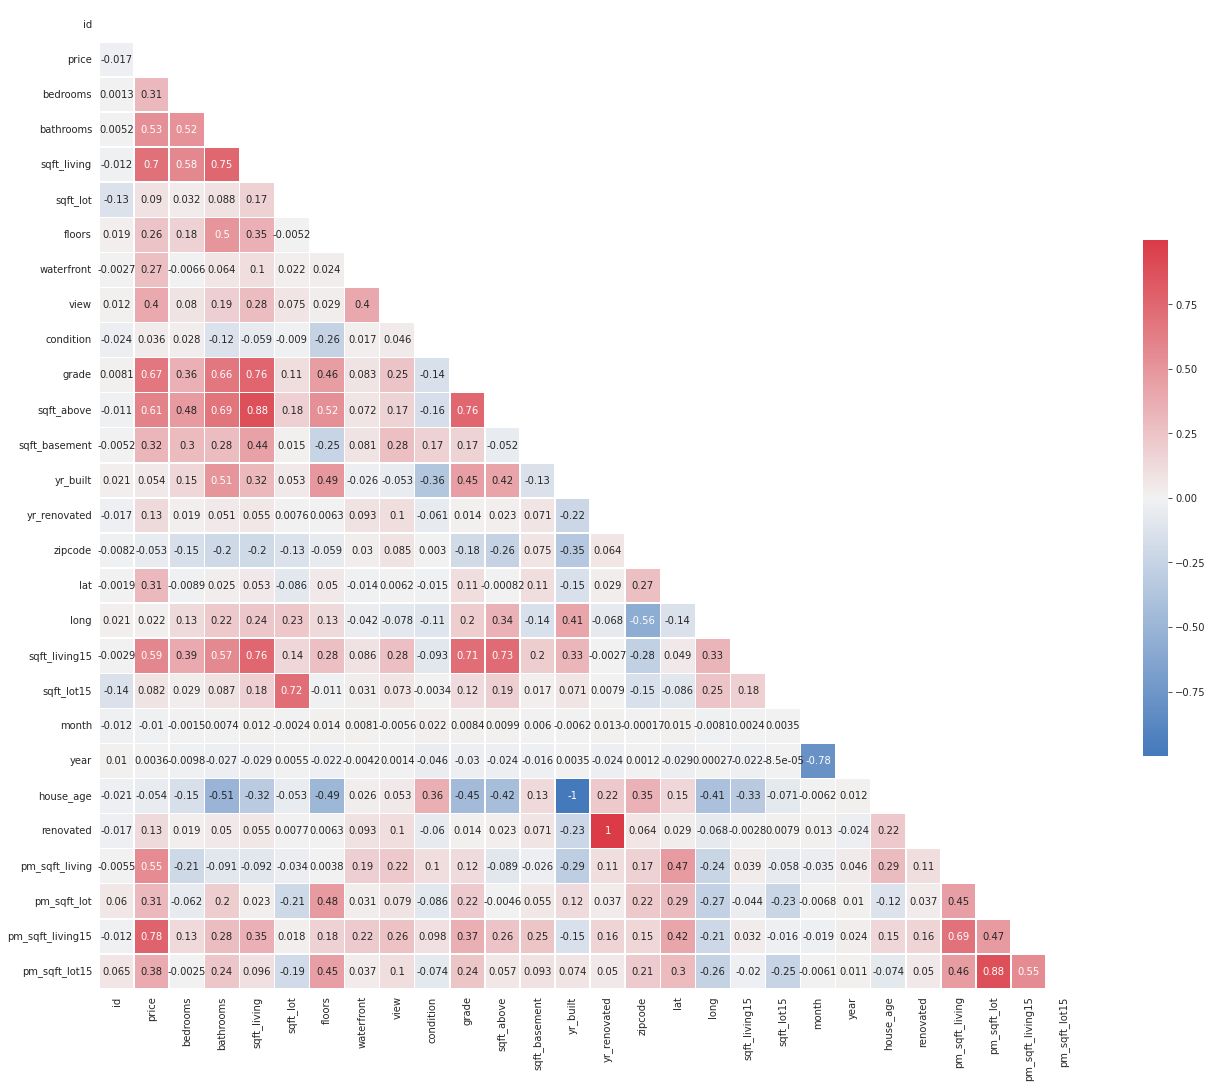

In [ ]:
dfMatrix = df.corr()
CorrMtx(dfMatrix, True)

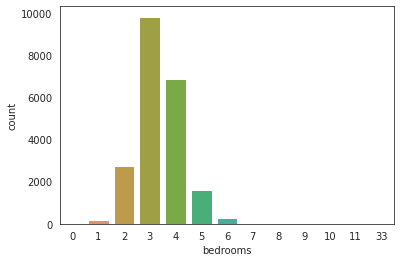

In [ ]:
sns.countplot(x = df["bedrooms"]); #criando um gráfico para verificar a quantidade de quartos x qtde total de imóveis

In [ ]:
df["bedrooms"].value_counts() # mostrando a quantidade de quarots com os valores totais

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Text(0.0, 1.0, 'Gráfico Box-Plot da quantidade de quartos')

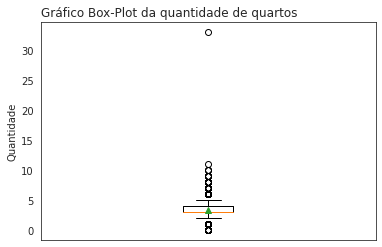

In [ ]:
fig = plt.figure()
plt.boxplot(df['bedrooms'], showmeans = True)
plt.ylabel('Quantidade')
plt.xticks([1], ['']) # Remove o valor do eixo x
plt.title('Gráfico Box-Plot da quantidade de quartos', loc = 'left')

Text(0.0, 1.0, 'Gráfico Box-Plot da quantidade de quartos')

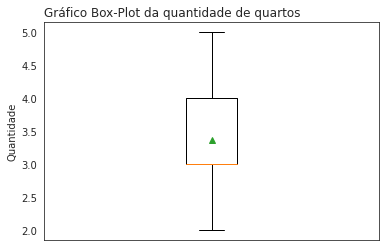

In [ ]:
# o mesmo gráfico anterior mas sem os outliers para melhor visualização
fig = plt.figure()
plt.boxplot(df['bedrooms'], showmeans = True, showfliers=False)
plt.ylabel('Quantidade')
plt.xticks([1], ['']) # Remove o valor do eixo x
plt.title('Gráfico Box-Plot da quantidade de quartos', loc = 'left')

In [ ]:
# retirando as casas com menos de 1 quarto e mais de 6
drop1 = df[df.bedrooms == 0]
for row in drop1.index:
    df = df.drop([row])

drop2 = df[df.bedrooms > 6]
for row in drop2.index:
    df = df.drop([row])

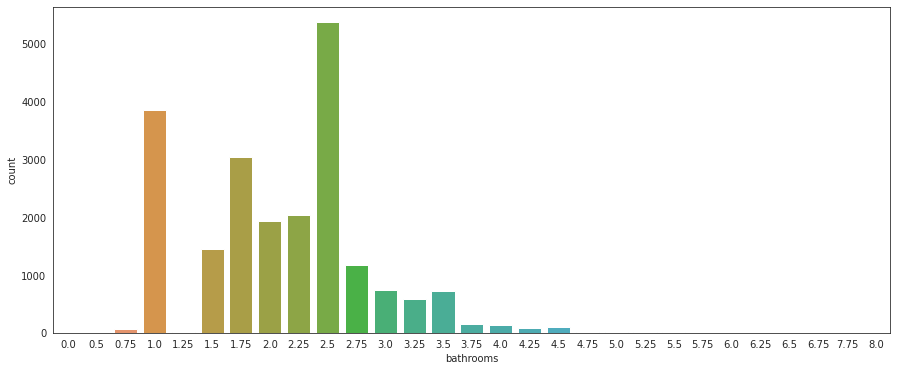

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(x = df["bathrooms"]); #criando um gráfico para verificar a quantidade de banheiros x qtde total de imóveis

In [ ]:
df["bathrooms"].value_counts() # mostrando a quantidade de banheiros com os valores totais

2.50    5374
1.00    3850
1.75    3047
2.25    2044
2.00    1929
1.50    1443
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
4.25      77
0.75      71
4.75      21
5.00      20
5.25      12
1.25       9
5.50       9
6.00       5
0.50       4
0.00       3
5.75       3
6.25       2
6.50       2
8.00       1
6.75       1
7.75       1
Name: bathrooms, dtype: int64

Text(0.0, 1.0, 'Gráfico Box-Plot da quantidade de banheiros')

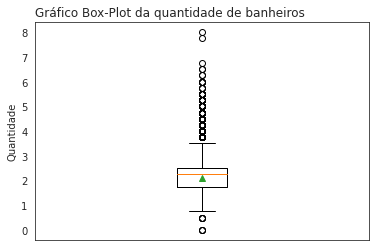

In [ ]:
fig = plt.figure()
plt.boxplot(df['bathrooms'], showmeans = True)
plt.ylabel('Quantidade')
plt.xticks([1], ['']) # Remove o valor do eixo x
plt.title('Gráfico Box-Plot da quantidade de banheiros', loc = 'left')

Text(0.0, 1.0, 'Gráfico Box-Plot da quantidade de banheiros')

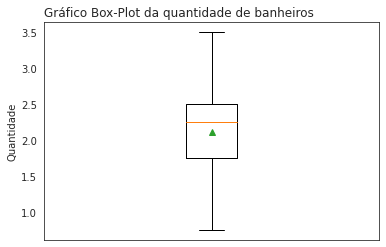

In [ ]:
# o mesmo gráfico anterior mas sem os outliers para melhor visualização
fig = plt.figure()
plt.boxplot(df['bathrooms'], showmeans = True, showfliers=False)
plt.ylabel('Quantidade')
plt.xticks([1], ['']) # Remove o valor do eixo x
plt.title('Gráfico Box-Plot da quantidade de banheiros', loc = 'left')

In [ ]:
# retirando as casas com menos de 1 banheiro e mais de 6
drop3 = df[df.bathrooms < .50]
for row in drop3.index:
    df = df.drop([row])

drop4 = df[df.bathrooms > 6]
for row in drop4.index:
    df = df.drop([row])

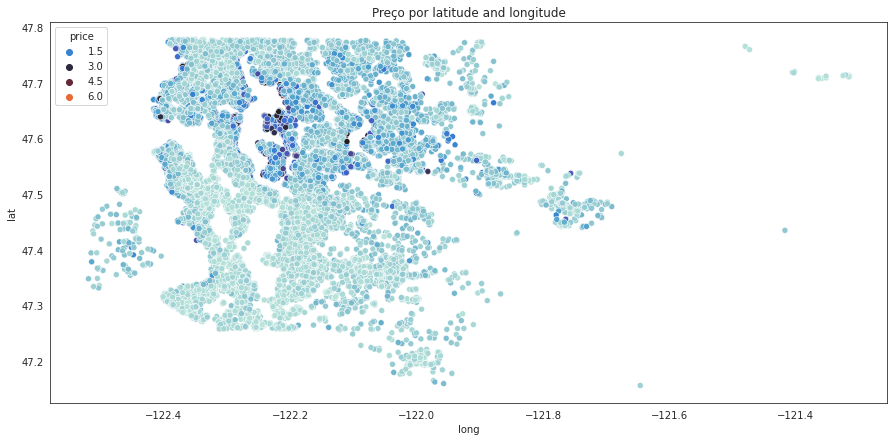

In [ ]:
plt.figure(figsize= (15,7)) #plotando uma figura para ver os preços com base na lat/long
plt.title("Preço por latitude and longitude")
sns.scatterplot(data = df, x= "long", y = "lat", hue="price", palette="icefire");

In [ ]:
# encontrando os id's repetidos, ou seja, as casas que foram vendidas mais de 1 vez

id_repetido = pd.concat(g for x, g in df.groupby('id') if len(g) > 1)
id_repetido

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,month,year,day_week,house_age,renovated,City,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
2496,1000102,280000,6,3.00,2400,9373,2.0,0,0,3,...,9,2014,Tuesday,23,0,Auburn,116.67,29.87,135.92,38.27
2497,1000102,300000,6,3.00,2400,9373,2.0,0,0,3,...,4,2015,Wednesday,24,0,Auburn,125.00,32.01,145.63,41.01
16814,7200179,150000,2,1.00,840,12750,1.0,0,0,3,...,10,2014,Thursday,89,0,Renton,178.57,11.76,101.35,21.52
16815,7200179,175000,2,1.00,840,12750,1.0,0,0,3,...,4,2015,Friday,90,0,Renton,208.33,13.73,118.24,25.11
11433,109200390,245000,3,1.75,1480,3900,1.0,0,0,4,...,8,2014,Wednesday,34,0,Federal Way,165.54,62.82,133.88,35.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,9828200460,430000,2,1.00,700,4800,1.0,0,0,3,...,1,2015,Tuesday,93,0,Seattle,614.29,89.58,298.61,89.58
15199,9834200305,350000,3,1.00,1790,3876,1.5,0,0,5,...,7,2014,Wednesday,110,0,Seattle,195.53,90.30,257.35,85.78
15200,9834200305,615000,3,1.00,1790,3876,1.5,0,0,5,...,2,2015,Tuesday,111,0,Seattle,343.58,158.67,452.21,150.74
1085,9834200885,360000,4,2.50,2080,4080,1.0,0,0,5,...,7,2014,Thursday,52,0,Seattle,173.08,88.24,268.66,88.24


In [ ]:
# encontrando a primeira venda
venda2 = id_repetido.duplicated(subset=['id'], keep = 'first')
venda1 = id_repetido[~venda2]
venda1 = venda1[venda1.id != 795000620] # foi necessário retirar esse id porque ele foi vendido 3 vezes no período, causando assim um erro 
                                        # na hora de calcular o lucro/prejuízo, pois os df ficavam desiguais em nº de linhas
venda1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,month,year,day_week,house_age,renovated,City,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
2496,1000102,280000,6,3.00,2400,9373,2.0,0,0,3,...,9,2014,Tuesday,23,0,Auburn,116.67,29.87,135.92,38.27
16814,7200179,150000,2,1.00,840,12750,1.0,0,0,3,...,10,2014,Thursday,89,0,Renton,178.57,11.76,101.35,21.52
11433,109200390,245000,3,1.75,1480,3900,1.0,0,0,4,...,8,2014,Wednesday,34,0,Federal Way,165.54,62.82,133.88,35.22
12417,123039336,148000,1,1.00,620,8261,1.0,0,0,3,...,6,2014,Wednesday,75,0,Seattle,238.71,17.92,125.42,17.95
7792,251300110,225000,3,2.25,2510,12013,2.0,0,0,3,...,7,2014,Thursday,26,0,Federal Way,89.64,18.73,120.32,28.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,9407110710,195000,3,1.75,1510,8400,1.0,0,0,2,...,11,2014,Friday,35,0,North Bend,129.14,23.21,130.00,19.26
4922,9809000020,1895000,5,2.25,3120,16672,2.0,0,0,4,...,5,2014,Tuesday,45,0,Bellevue,607.37,113.66,506.68,106.14
6345,9828200460,260000,2,1.00,700,4800,1.0,0,0,3,...,6,2014,Friday,92,0,Seattle,371.43,54.17,180.56,54.17
15199,9834200305,350000,3,1.00,1790,3876,1.5,0,0,5,...,7,2014,Wednesday,110,0,Seattle,195.53,90.30,257.35,85.78


In [ ]:
# encontrando a segunda venda
venda2 = id_repetido[venda2]
venda2 = venda2[venda2.id != 795000620]# foi necessário retirar esse id porque ele foi vendido 3 vezes no período, causando assim um erro 
                                       # na hora de calcular o lucro/prejuízo, pois os df ficavam desiguais em nº de linha
venda2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,month,year,day_week,house_age,renovated,City,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
2497,1000102,300000,6,3.00,2400,9373,2.0,0,0,3,...,4,2015,Wednesday,24,0,Auburn,125.00,32.01,145.63,41.01
16815,7200179,175000,2,1.00,840,12750,1.0,0,0,3,...,4,2015,Friday,90,0,Renton,208.33,13.73,118.24,25.11
11434,109200390,250000,3,1.75,1480,3900,1.0,0,0,4,...,10,2014,Monday,34,0,Federal Way,168.92,64.10,136.61,35.94
12418,123039336,244900,1,1.00,620,8261,1.0,0,0,3,...,12,2014,Monday,75,0,Seattle,395.00,29.65,207.54,29.71
7793,251300110,358000,3,2.25,2510,12013,2.0,0,0,3,...,1,2015,Wednesday,27,0,Federal Way,142.63,29.80,191.44,44.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,9407110710,322000,3,1.75,1510,8400,1.0,0,0,2,...,2,2015,Thursday,36,0,North Bend,213.25,38.33,214.67,31.80
4923,9809000020,1940000,5,2.25,3120,16672,2.0,0,0,4,...,3,2015,Friday,46,0,Bellevue,621.79,116.36,518.72,108.67
6346,9828200460,430000,2,1.00,700,4800,1.0,0,0,3,...,1,2015,Tuesday,93,0,Seattle,614.29,89.58,298.61,89.58
15200,9834200305,615000,3,1.00,1790,3876,1.5,0,0,5,...,2,2015,Tuesday,111,0,Seattle,343.58,158.67,452.21,150.74


In [ ]:
venda1['id'].value_counts().sort_values() # colocando em ordem os id's para poder aplicar a função merge_asof

1000102       1
705730280     1
109200390     1
123039336     1
251300110     1
             ..
9407110710    1
9809000020    1
9828200460    1
9211500620    1
9834200885    1
Name: id, Length: 175, dtype: int64

In [ ]:
venda2['id'].value_counts().sort_values() # colocando em ordem os id's para poder aplicar a função merge_asof

1000102       1
705730280     1
109200390     1
123039336     1
251300110     1
             ..
9407110710    1
9809000020    1
9828200460    1
9211500620    1
9834200885    1
Name: id, Length: 175, dtype: int64

In [ ]:
lucro_prej = pd.merge_asof(venda1, venda2, on='id') # juntando as informações das vendas
lucro_prej = lucro_prej.loc[:,['id', 'price_x', 'price_y']] # unindo pelo id
lucro_prej = lucro_prej.rename({'price_x': 'primeira_venda'}, axis = 1) # renomeando a coluna
lucro_prej = lucro_prej.rename({'price_y': 'segunda_venda'}, axis = 1) # renomeando a coluna
lucro_prej

,id,primeira_venda,segunda_venda
0,1000102,280000,300000
1,7200179,150000,175000
2,109200390,245000,250000
3,123039336,148000,244900
4,251300110,225000,358000
...,...,...,...
170,9407110710,195000,322000
171,9809000020,1895000,1940000
172,9828200460,260000,430000
173,9834200305,350000,615000


In [ ]:
lucro_prej['lucro/prejuízo'] = lucro_prej['segunda_venda'] - lucro_prej['primeira_venda'] # calculando o valor do lucro ou prejuízo
lucro_prej['variação'] = ((lucro_prej['segunda_venda'] - lucro_prej['primeira_venda']) / lucro_prej['primeira_venda'] * 100).round(decimals = 2) # calculando a % do lucro ou prejuízo
lucro_prej.sort_values(by=['variação'], ascending=False, inplace = True) # ordenando em ordem crescente
lucro_prej

,id,primeira_venda,segunda_venda,lucro/prejuízo,variação
45,2023049218,105500,445000,339500,321.80
125,7129304540,133000,440000,307000,230.83
72,3333002450,165000,490000,325000,196.97
52,2422049104,85000,235000,150000,176.47
82,3883800011,82000,219900,137900,168.17
...,...,...,...,...,...
87,4139420590,1212500,1200000,-12500,-1.03
62,2767603612,500000,489000,-11000,-2.20
158,8682262400,430000,419950,-10050,-2.34
60,2726049071,510000,489950,-20050,-3.93


In [ ]:
maiores_lucros = lucro_prej.head(25) # vizualizando os 25 maiores lucros
maiores_lucros

,id,primeira_venda,segunda_venda,lucro/prejuízo,variação
45,2023049218,105500,445000,339500,321.80
125,7129304540,133000,440000,307000,230.83
72,3333002450,165000,490000,325000,196.97
52,2422049104,85000,235000,150000,176.47
82,3883800011,82000,219900,137900,168.17
112,6021500970,345000,874950,529950,153.61
24,1423049019,90000,220000,130000,144.44
105,5132000140,175000,415000,240000,137.14
115,6141100320,245000,570000,325000,132.65
90,4154300296,235000,545000,310000,131.91


In [ ]:
dados1 = pd.merge(maiores_lucros, df, on='id', how='left') #juntando os dois df para encontrar o resto das informações dos 25 imóveis mais lucrativos
dados1

,id,primeira_venda,segunda_venda,lucro/prejuízo,variação,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,month,year,day_week,house_age,renovated,City,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
0,2023049218,105500,445000,339500,321.80,105500,2,1.00,930,7740,...,7,2014,Wednesday,82,0,Seattle,113.44,13.63,65.12,12.29
1,2023049218,105500,445000,339500,321.80,445000,2,1.00,930,7740,...,3,2015,Monday,83,0,Seattle,478.49,57.49,274.69,51.84
2,7129304540,133000,440000,307000,230.83,133000,5,2.00,1430,5600,...,12,2014,Saturday,67,0,Seattle,93.01,23.75,71.51,22.24
3,7129304540,133000,440000,307000,230.83,440000,5,2.00,1430,5600,...,5,2015,Thursday,68,0,Seattle,307.69,78.57,236.56,73.58
4,3333002450,165000,490000,325000,196.97,165000,1,1.00,850,8050,...,7,2014,Tuesday,108,0,Seattle,194.12,20.50,103.77,31.85
5,3333002450,165000,490000,325000,196.97,490000,1,1.00,850,8050,...,1,2015,Thursday,109,0,Seattle,576.47,60.87,308.18,94.59
6,2422049104,85000,235000,150000,176.47,85000,2,1.00,830,9000,...,9,2014,Monday,75,0,Kent,102.41,9.44,73.28,11.07
7,2422049104,85000,235000,150000,176.47,235000,2,1.00,830,9000,...,12,2014,Tuesday,75,0,Kent,283.13,26.11,202.59,30.60
8,3883800011,82000,219900,137900,168.17,82000,3,1.00,860,10426,...,11,2014,Wednesday,60,0,Seattle,95.35,7.86,71.93,7.29
9,3883800011,82000,219900,137900,168.17,219900,3,1.00,860,10426,...,4,2015,Wednesday,61,0,Seattle,255.70,21.09,192.89,19.55


In [ ]:
dados1 = pd.concat(g for x, g in dados1.groupby('id') if len(g) > 1) #filtrando os 25 imóveis mais lucrativos
dados1

,id,primeira_venda,segunda_venda,lucro/prejuízo,variação,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,month,year,day_week,house_age,renovated,City,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
24,324000530,201500,459000,257500,127.79,201500,3,1.00,1320,5000,...,7,2014,Tuesday,102,0,Seattle,152.65,40.30,152.65,48.22
25,324000530,201500,459000,257500,127.79,459000,3,1.00,1320,5000,...,3,2015,Monday,103,0,Seattle,347.73,91.80,347.73,109.83
28,1219000473,164950,371000,206050,124.92,164950,3,1.75,1570,15330,...,6,2014,Thursday,58,0,Seattle,105.06,10.76,131.96,12.37
29,1219000473,164950,371000,206050,124.92,371000,3,1.75,1570,15330,...,3,2015,Monday,59,0,Seattle,236.31,24.20,296.80,27.83
48,1231000510,263000,510000,247000,93.92,263000,3,1.75,1490,3800,...,9,2014,Monday,101,0,Seattle,176.51,69.21,120.64,65.75
49,1231000510,263000,510000,247000,93.92,510000,3,1.75,1490,3800,...,5,2015,Monday,102,0,Seattle,342.28,134.21,233.94,127.50
12,1423049019,90000,220000,130000,144.44,90000,2,1.00,580,7500,...,5,2014,Friday,71,0,Seattle,155.17,12.00,52.94,8.00
13,1423049019,90000,220000,130000,144.44,220000,2,1.00,580,7500,...,3,2015,Tuesday,72,0,Seattle,379.31,29.33,129.41,19.56
46,1568100300,350000,682500,332500,95.00,350000,6,4.50,3500,8504,...,9,2014,Wednesday,34,0,Seattle,100.00,41.16,225.81,41.37
47,1568100300,350000,682500,332500,95.00,682500,6,4.50,3500,8504,...,1,2015,Wednesday,35,0,Seattle,195.00,80.26,440.32,80.67


In [ ]:
dados2 = dados1.duplicated(subset=['id'], keep = 'first') #removendo os dados duplicados
dados2 = dados1[~dados2]
dados2

,id,primeira_venda,segunda_venda,lucro/prejuízo,variação,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,month,year,day_week,house_age,renovated,City,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
24,324000530,201500,459000,257500,127.79,201500,3,1.00,1320,5000,...,7,2014,Tuesday,102,0,Seattle,152.65,40.30,152.65,48.22
28,1219000473,164950,371000,206050,124.92,164950,3,1.75,1570,15330,...,6,2014,Thursday,58,0,Seattle,105.06,10.76,131.96,12.37
48,1231000510,263000,510000,247000,93.92,263000,3,1.75,1490,3800,...,9,2014,Monday,101,0,Seattle,176.51,69.21,120.64,65.75
12,1423049019,90000,220000,130000,144.44,90000,2,1.00,580,7500,...,5,2014,Friday,71,0,Seattle,155.17,12.00,52.94,8.00
46,1568100300,350000,682500,332500,95.00,350000,6,4.50,3500,8504,...,9,2014,Wednesday,34,0,Seattle,100.00,41.16,225.81,41.37
30,1781500435,260000,575000,315000,121.15,260000,3,1.75,1580,7344,...,8,2014,Wednesday,103,0,Seattle,164.56,35.40,164.56,41.89
20,1788900230,86500,199950,113450,131.16,86500,3,1.00,840,9480,...,7,2014,Tuesday,54,0,Federal Way,102.98,9.12,102.98,9.18
0,2023049218,105500,445000,339500,321.80,105500,2,1.00,930,7740,...,7,2014,Wednesday,82,0,Seattle,113.44,13.63,65.12,12.29
6,2422049104,85000,235000,150000,176.47,85000,2,1.00,830,9000,...,9,2014,Monday,75,0,Kent,102.41,9.44,73.28,11.07
36,2568300045,305000,649950,344950,113.10,305000,6,2.00,1900,8240,...,6,2014,Wednesday,50,0,Seattle,160.53,37.01,160.53,37.01


In [ ]:
dados4 = dados2.drop(['primeira_venda', 'segunda_venda', 'lucro/prejuízo', 'variação', 'waterfront', 'view', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'day_week', 'renovated'], axis = 1,)
dados4

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,year,house_age,City,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
24,324000530,201500,3,1.00,1320,5000,1.5,3,7,1320,2014,102,Seattle,152.65,40.30,152.65,48.22
28,1219000473,164950,3,1.75,1570,15330,1.0,3,7,1080,2014,58,Seattle,105.06,10.76,131.96,12.37
48,1231000510,263000,3,1.75,1490,3800,1.0,3,6,700,2014,101,Seattle,176.51,69.21,120.64,65.75
12,1423049019,90000,2,1.00,580,7500,1.0,3,5,580,2014,71,Seattle,155.17,12.00,52.94,8.00
46,1568100300,350000,6,4.50,3500,8504,2.0,3,7,3500,2014,34,Seattle,100.00,41.16,225.81,41.37
30,1781500435,260000,3,1.75,1580,7344,1.0,5,7,1580,2014,103,Seattle,164.56,35.40,164.56,41.89
20,1788900230,86500,3,1.00,840,9480,1.0,3,6,840,2014,54,Federal Way,102.98,9.12,102.98,9.18
0,2023049218,105500,2,1.00,930,7740,1.0,1,5,930,2014,82,Seattle,113.44,13.63,65.12,12.29
6,2422049104,85000,2,1.00,830,9000,1.0,3,6,830,2014,75,Kent,102.41,9.44,73.28,11.07
36,2568300045,305000,6,2.00,1900,8240,1.0,2,7,1200,2014,50,Seattle,160.53,37.01,160.53,37.01


In [ ]:
dados4.describe() #descrição das principais métricas do df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,year,house_age,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
count,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4.163307e+09,200058.000000,3.200000,1.490000,1407.200000,7662.440000,1.120000,2.920000,6.480000,1192.400000,2014.0,70.040000,147.200400,30.884400,134.063200,31.890000
std,2.497552e+09,86488.960856,1.414214,0.772172,603.873055,2625.140474,0.261406,0.702377,0.653197,546.079054,0.0,21.448543,57.078998,20.986379,54.889568,20.492416
min,3.240005e+08,82000.000000,1.000000,1.000000,580.000000,3800.000000,1.000000,1.000000,5.000000,580.000000,2014.0,34.000000,93.010000,7.860000,52.940000,7.290000
25%,1.788900e+09,115000.000000,2.000000,1.000000,930.000000,5120.000000,1.000000,3.000000,6.000000,910.000000,2014.0,54.000000,102.980000,13.630000,95.830000,12.370000
50%,4.031001e+09,201500.000000,3.000000,1.000000,1380.000000,7680.000000,1.000000,3.000000,7.000000,1120.000000,2014.0,67.000000,127.740000,23.750000,131.960000,31.850000
75%,6.141100e+09,250000.000000,3.000000,1.750000,1580.000000,9000.000000,1.000000,3.000000,7.000000,1320.000000,2014.0,83.000000,164.560000,37.010000,164.560000,41.890000
max,7.977201e+09,350000.000000,6.000000,4.500000,3500.000000,15330.000000,2.000000,5.000000,7.000000,3500.000000,2014.0,108.000000,319.440000,86.250000,265.150000,81.370000


In [ ]:
dados4.mode() #encontrando a moda

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,year,house_age,City,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
0,324000530,245000.0,3.0,1.0,580,3800,1.0,3.0,7.0,930.0,2014.0,58.0,Seattle,100.0,7.86,52.94,7.29
1,1219000473,350000.0,NaN,NaN,830,4000,NaN,NaN,NaN,1080.0,NaN,NaN,NaN,NaN,9.12,65.12,8.00
2,1231000510,NaN,NaN,NaN,840,4590,NaN,NaN,NaN,1430.0,NaN,NaN,NaN,NaN,9.44,71.51,9.18
3,1423049019,NaN,NaN,NaN,850,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.76,71.93,11.07
4,1568100300,NaN,NaN,NaN,860,5030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.72,73.28,11.72
5,1781500435,NaN,NaN,NaN,910,5080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00,75.89,12.29
6,1788900230,NaN,NaN,NaN,930,5120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.63,95.83,12.37
7,2023049218,NaN,NaN,NaN,960,5600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.50,102.98,17.78
8,2422049104,NaN,NaN,NaN,1080,6685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.59,103.77,20.85
9,2568300045,NaN,NaN,NaN,1150,7344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.77,108.25,22.24


In [ ]:
id_n_filtrar = dados4['id'].tolist()
id_n_filtrar

[324000530,
 1219000473,
 1231000510,
 1423049019,
 1568100300,
 1781500435,
 1788900230,
 2023049218,
 2422049104,
 2568300045,
 3333002450,
 3883800011,
 4031000520,
 4154300296,
 4302201085,
 5132000140,
 5249801440,
 6021500970,
 6141100320,
 6623400187,
 7129304540,
 7893805650,
 7899800045,
 7961500010,
 7977201065]

In [ ]:
lista_casas = df[((df.bedrooms > 2) & (df.bedrooms < 6)) & (df.bathrooms >= 1) & (df.bathrooms <= 3)] #criando filtros para encontrar imóveis semelhantes
lista_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,month,year,house_age,renovated,pm_sqft_living,pm_sqft_lot,pm_sqft_living15,pm_sqft_lot15
count,1.655600e+04,1.655600e+04,16556.000000,16556.000000,16556.000000,1.655600e+04,16556.000000,16556.000000,16556.000000,16556.000000,...,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,4.602286e+09,5.024022e+05,3.497040,2.071545,2049.456451,1.436843e+04,1.478437,0.004711,0.189539,3.435008,...,1982.121587,12557.653962,6.562394,2014.323508,42.319703,0.037811,248.288476,79.195651,255.819979,78.144801
std,2.872485e+09,2.664399e+05,0.620249,0.562850,684.664672,3.482477e+04,0.525939,0.068479,0.684700,0.653086,...,599.456841,24419.471629,3.108979,0.467829,27.484576,0.190745,98.410656,81.262008,108.574979,74.396262
min,1.200019e+06,8.200000e+04,3.000000,1.000000,660.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,399.000000,651.000000,1.000000,2014.000000,-1.000000,0.000000,87.590000,0.420000,39.510000,0.510000
25%,2.132076e+09,3.200000e+05,3.000000,1.750000,1530.000000,5.463750e+03,1.000000,0.000000,0.000000,3.000000,...,1530.000000,5466.500000,4.000000,2014.000000,20.000000,0.000000,175.000000,32.327500,176.897500,33.730000
50%,3.918400e+09,4.450000e+05,3.000000,2.250000,1960.000000,7.859000e+03,1.500000,0.000000,0.000000,3.000000,...,1880.000000,7830.000000,6.000000,2014.000000,39.000000,0.000000,231.850000,54.420000,235.240000,55.590000
75%,7.334501e+09,6.155625e+05,4.000000,2.500000,2470.000000,1.071150e+04,2.000000,0.000000,0.000000,4.000000,...,2340.000000,10125.000000,9.000000,2015.000000,59.000000,0.000000,297.032500,94.845000,304.617500,94.640000
max,9.900000e+09,4.489000e+06,5.000000,3.000000,6430.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,5790.000000,560617.000000,12.000000,2015.000000,115.000000,1.000000,800.000000,1346.150000,1362.220000,980.390000


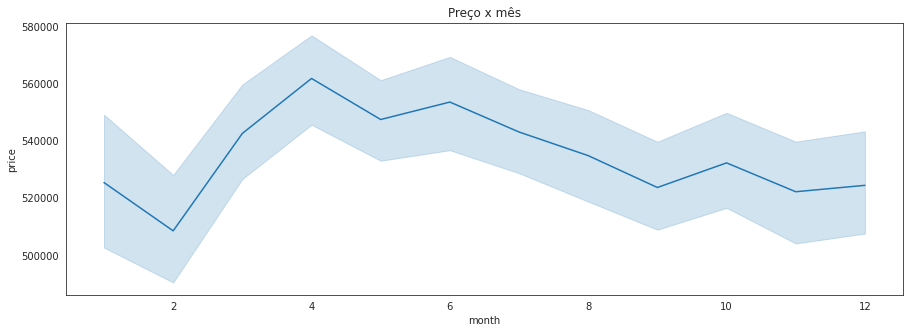

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Preço x mês")
sns.lineplot(data = df, x = "month", y = "price", palette="Set1"); #plotando uma figura de preço x mês

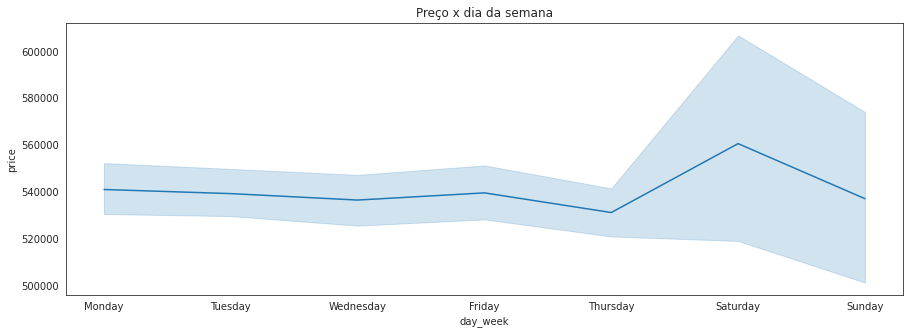

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Preço x dia da semana")
sns.lineplot(data = df, x = "day_week", y = "price", palette="Set1"); #plotando uma figura de preço x dia da semana